# **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.6 MB/s eta 0:00:00


# **Import all necessary Libraries**

In [2]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Download Dataset From Roboflow**

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NdtJjcJiaqyh6kXqq34s")
project = rf.workspace("khulna-university-uraug").project("road-sign-detection-3jl2n")
version = project.version(1)
dataset = version.download("yolov11")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 135.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.92
    Uninstalling opencv-python-headless-4.13.0.92:
      Successfully uninstalled opencv-python-headless-4.13.0.92
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to road-sign-detection-1 in yolov11:: 100%|██████████| 2998/2998 [00:00<00:00, 6001.85it/s]


# **Custom Training**

In [4]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/road-sign-detection-1/data.yaml epochs=100 imgsz=640 plots=True

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/road-sign-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

# **View Training Results**

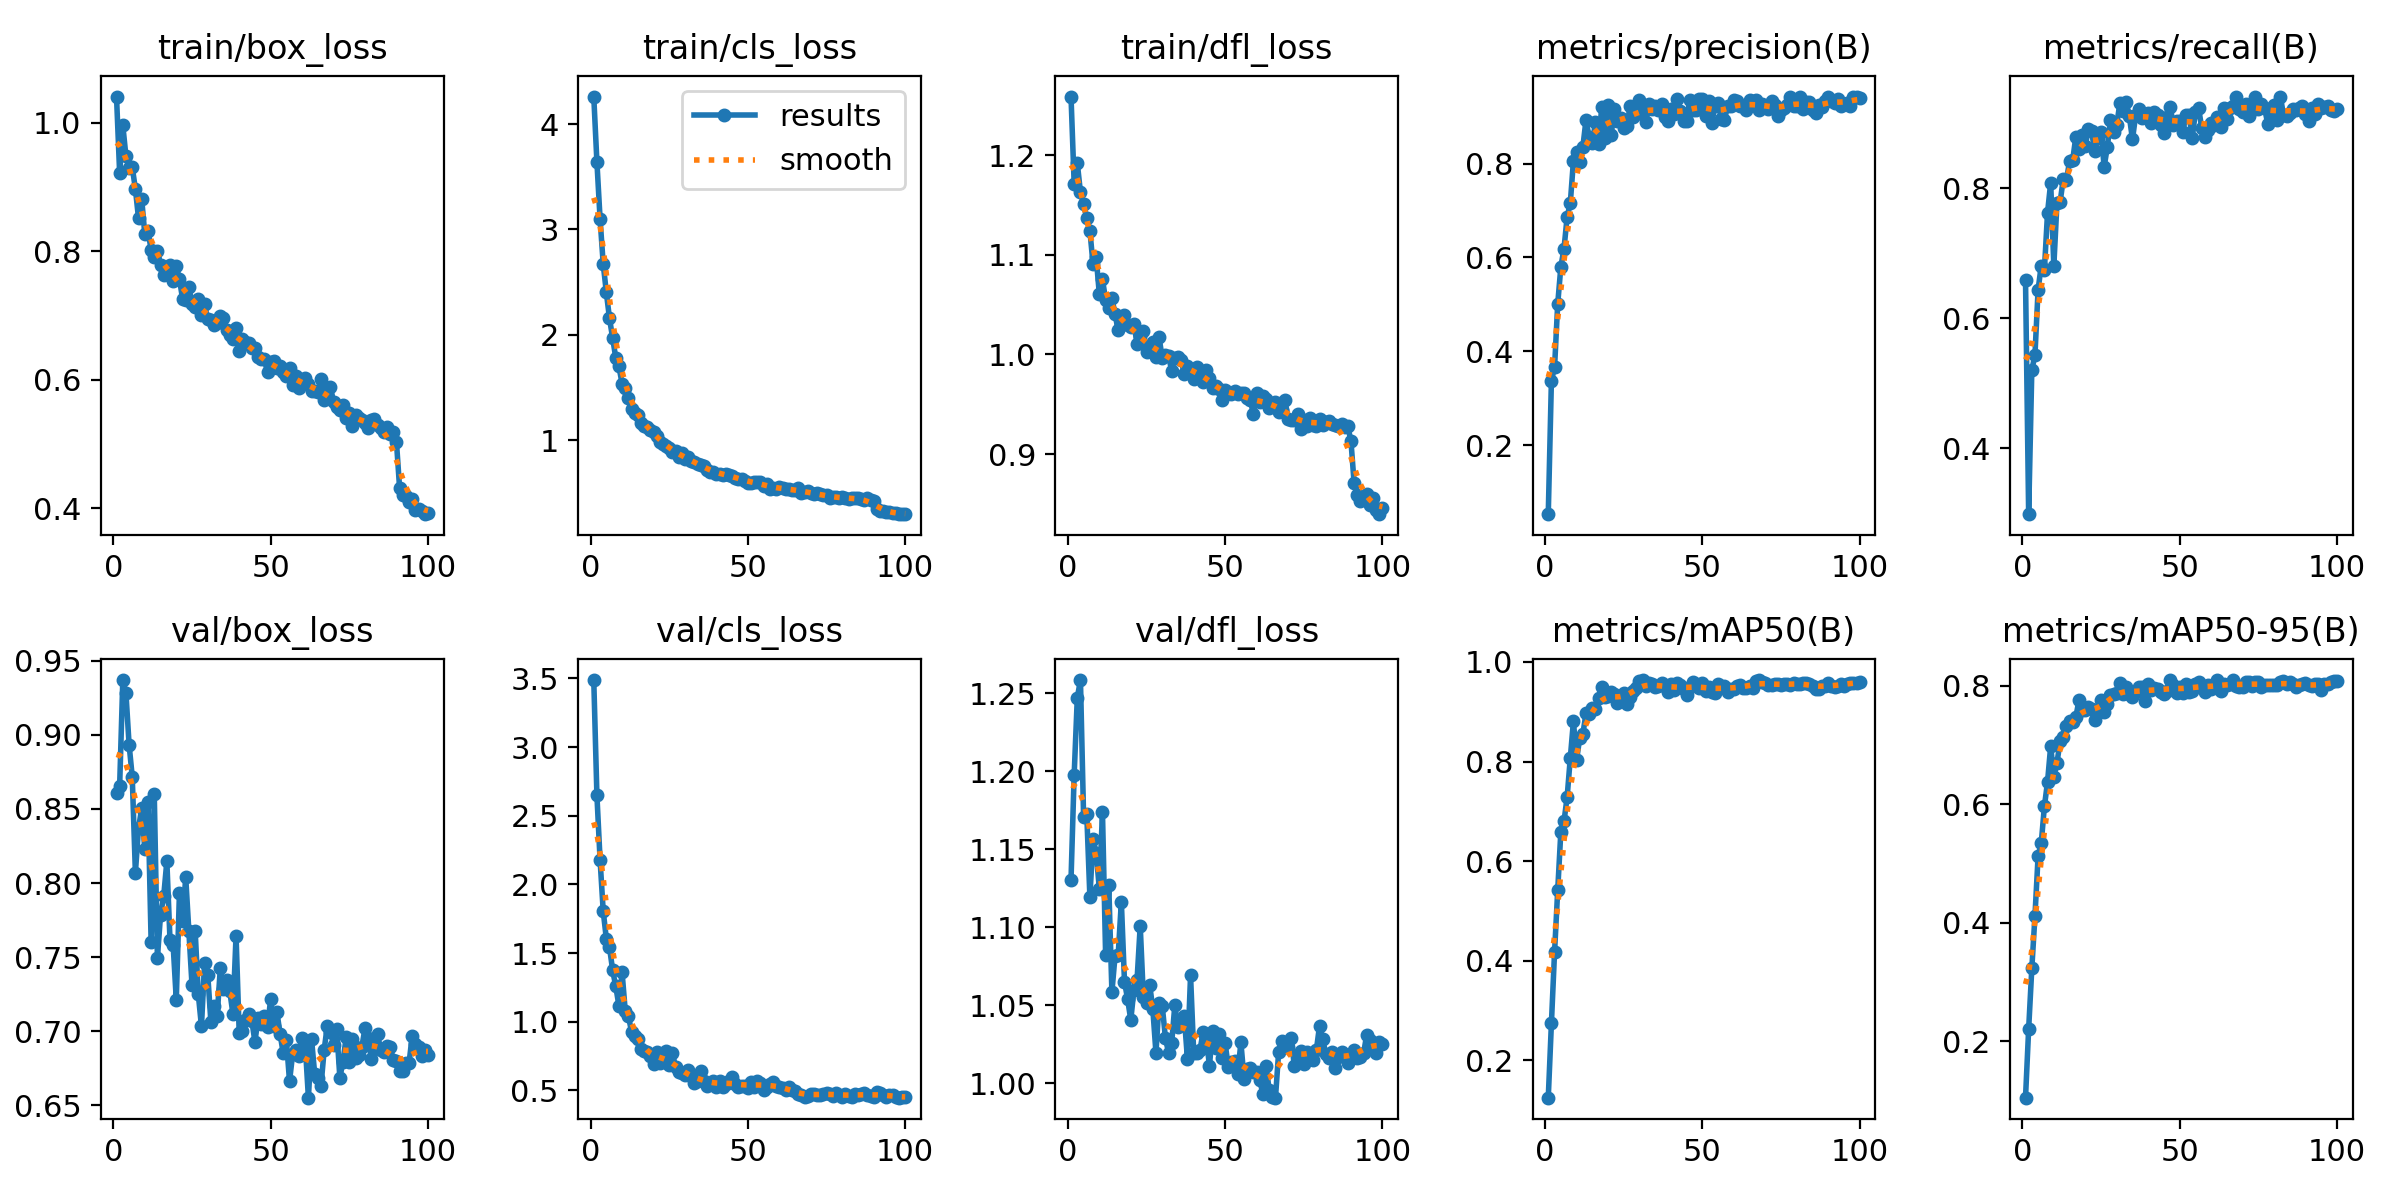

In [5]:
from IPython.display import Image
display(Image(filename='/content/runs/detect/train/results.png', width=600))

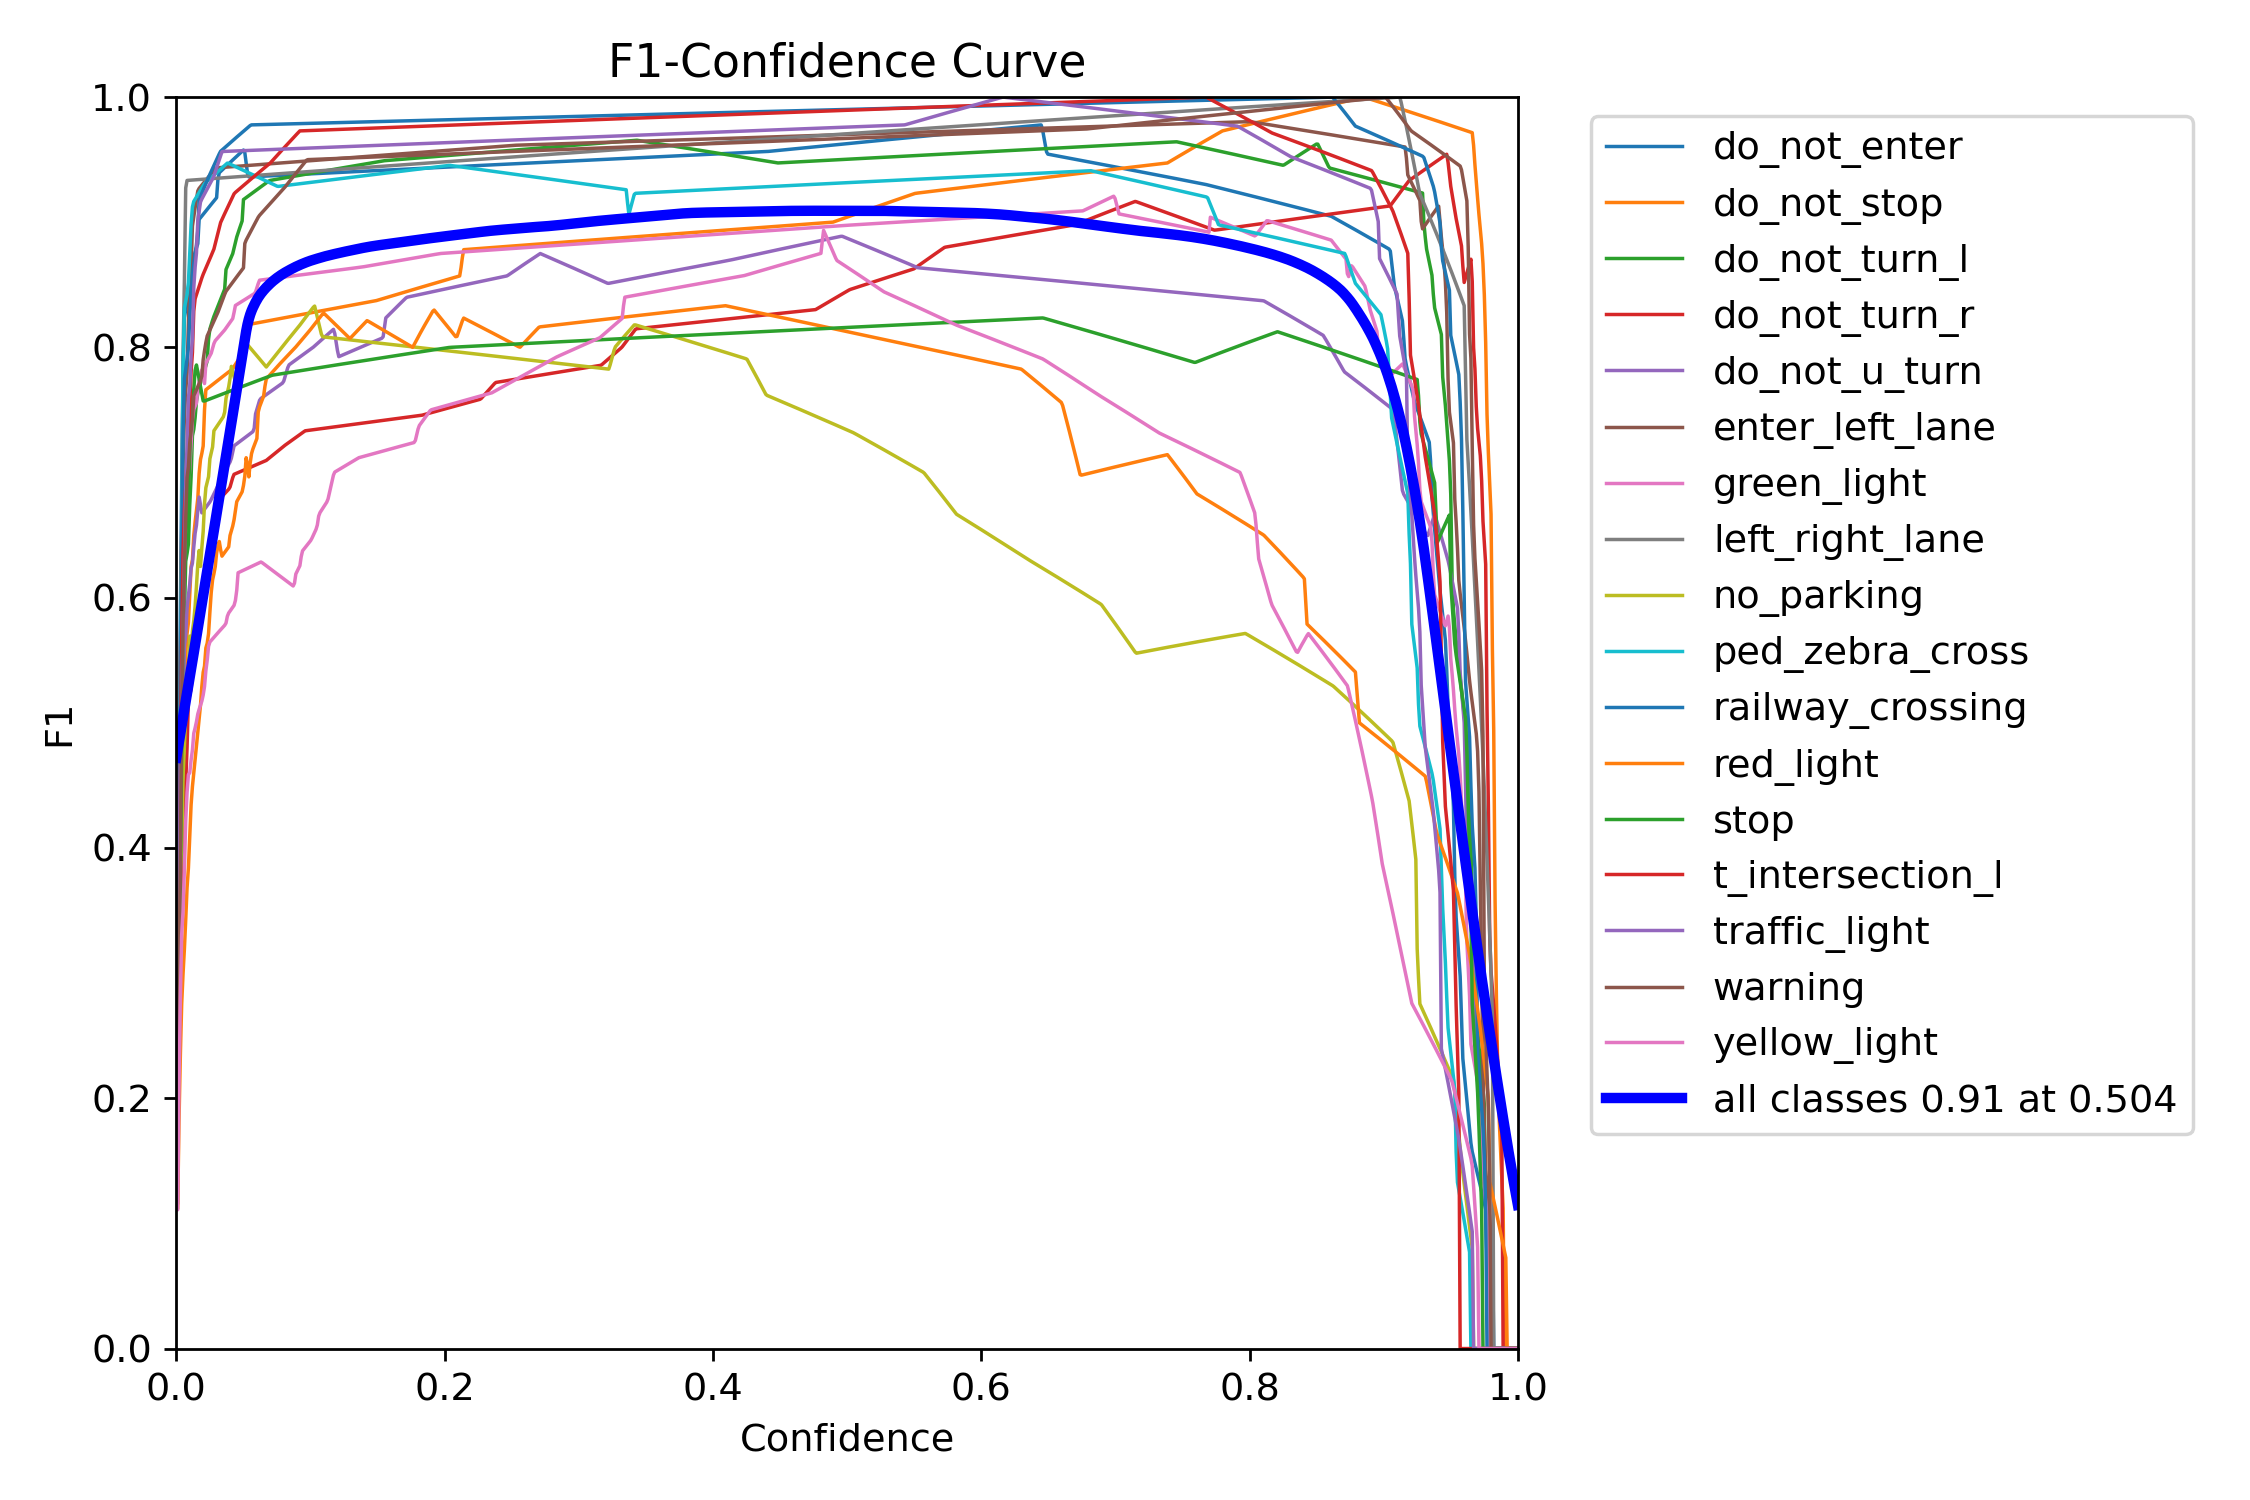

In [6]:
display(Image(filename='/content/runs/detect/train/BoxF1_curve.png', width=600))

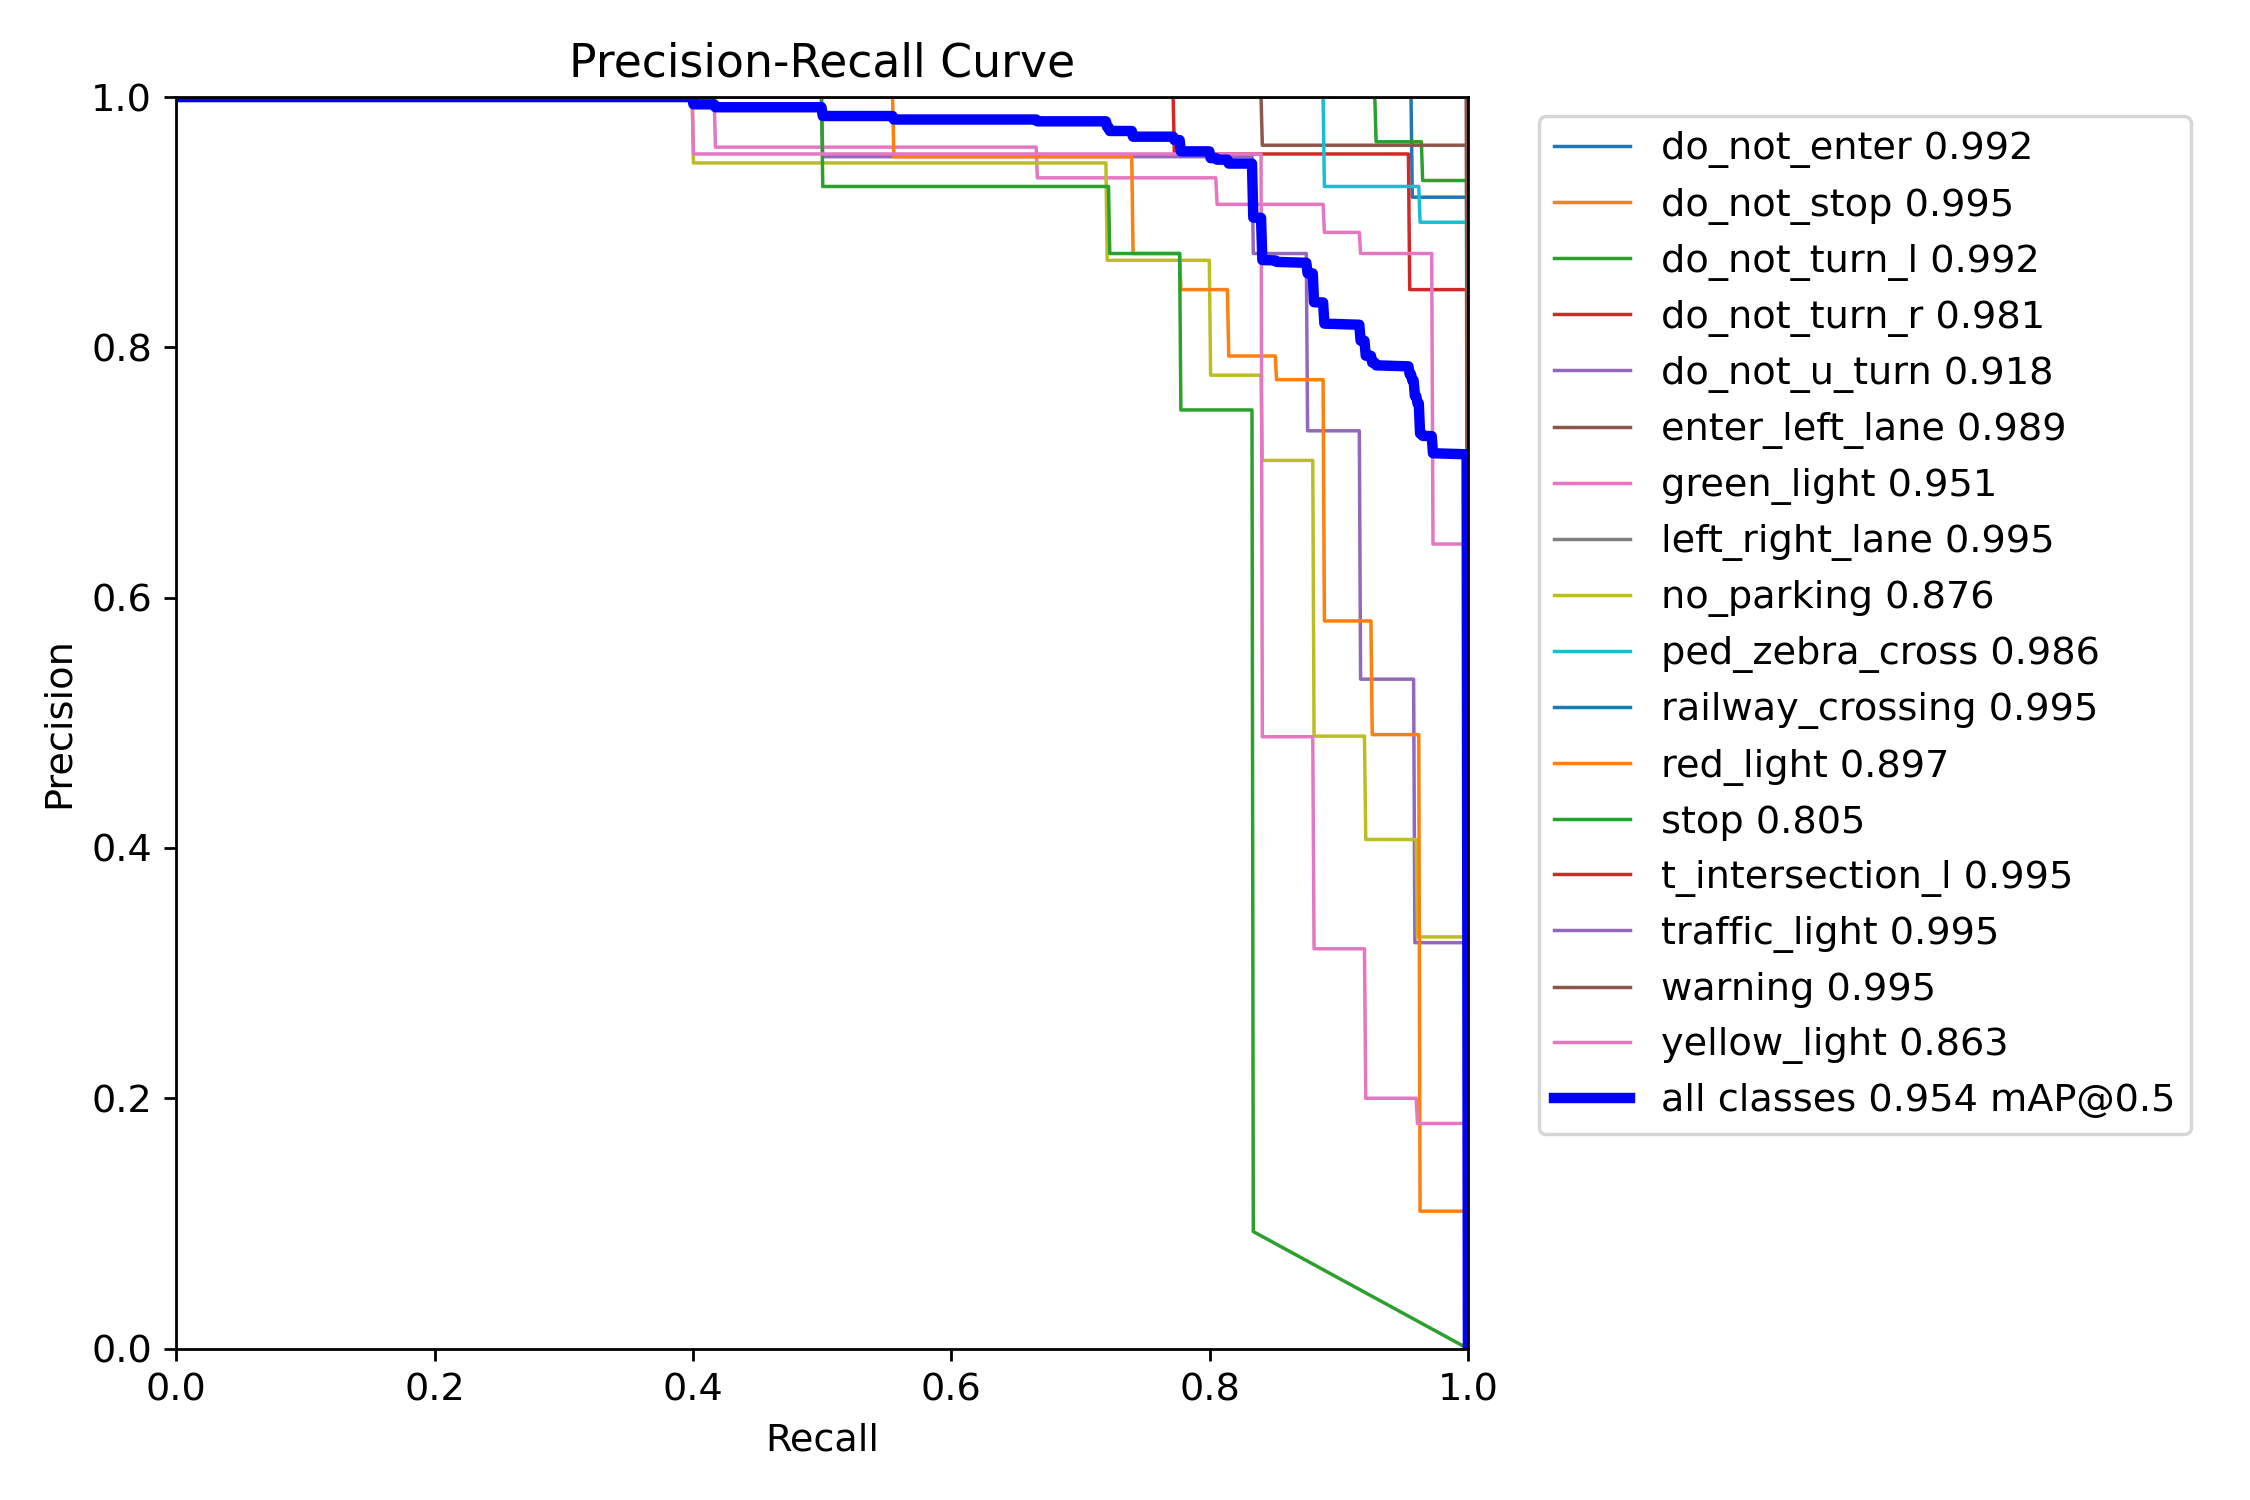

In [7]:
display(Image(filename='/content/runs/detect/train/BoxPR_curve.png', width=600))

### **Validate fine-tuned model**

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/road-sign-detection-1/data.yaml

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,586,247 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1412.3±344.0 MB/s, size: 28.8 KB)
val: Scanning /content/road-sign-detection-1/valid/labels.cache... 355 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 355/355 74.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 4.6it/s 5.0s
                   all        355        386      0.923      0.909      0.954      0.809
          do_not_enter         23         23      0.972      0.957      0.992      0.944
           do_not_stop         18         18      0.836          1      0.995       0.96
         do_not_turn_l         24         28      0.938      0.964      0.992      0.897
         do_not_turn_r         22         22      0.741          1      0.981      0.925
         do_not_u_turn         24

# **Inference with custom model**

In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/road-sign-detection-1/test/images save=True

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,586,247 parameters, 0 gradients, 6.3 GFLOPs

image 1/178 /content/road-sign-detection-1/test/images/perintah-pilihan-memasuki-salah-satu-jalur-64-_jpg.rf.81caa0746cb62e24916943bf90fa8057.jpg: 640x640 1 left_right_lane, 11.6ms
image 2/178 /content/road-sign-detection-1/test/images/perintah-pilihan-memasuki-salah-satu-jalur-67-_jpg.rf.acb4c8d2adb5d9d7071684fa97cb5f96.jpg: 640x640 1 left_right_lane, 1 red_light, 13.4ms
image 3/178 /content/road-sign-detection-1/test/images/perintah-pilihan-memasuki-salah-satu-jalur-69-_jpg.rf.9d6ac550a7bff09e8e7cbabb99fa510a.jpg: 640x640 1 left_right_lane, 7.5ms
image 4/178 /content/road-sign-detection-1/test/images/perintah-pilihan-memasuki-salah-satu-jalur-8-_jpg.rf.b262617db3c6ec964fac6c179ea2ab10.jpg: 640x640 1 left_right_lane, 7.5ms
image 5/178 /content/road-sign-detection-1/test/images/petunjuk-area-parkir-1-_jpg.rf.d7bc5ee3549f2e

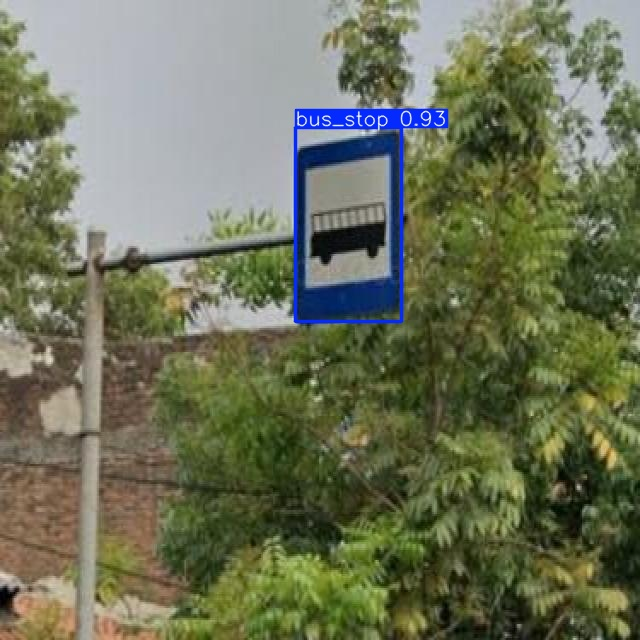

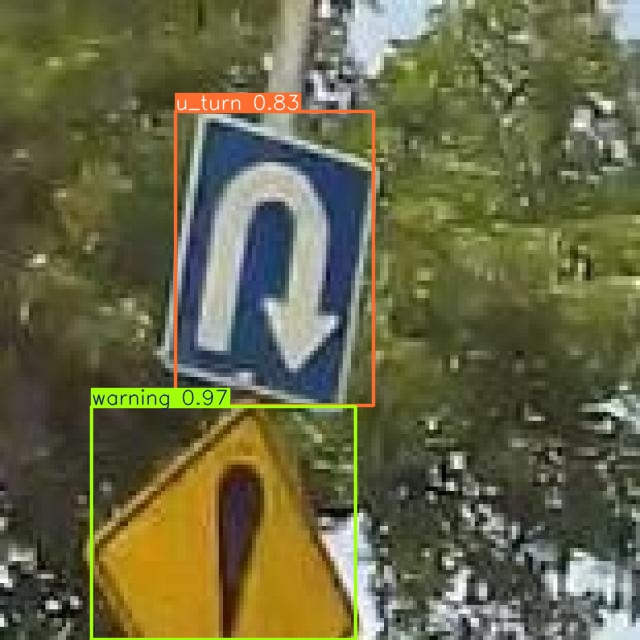

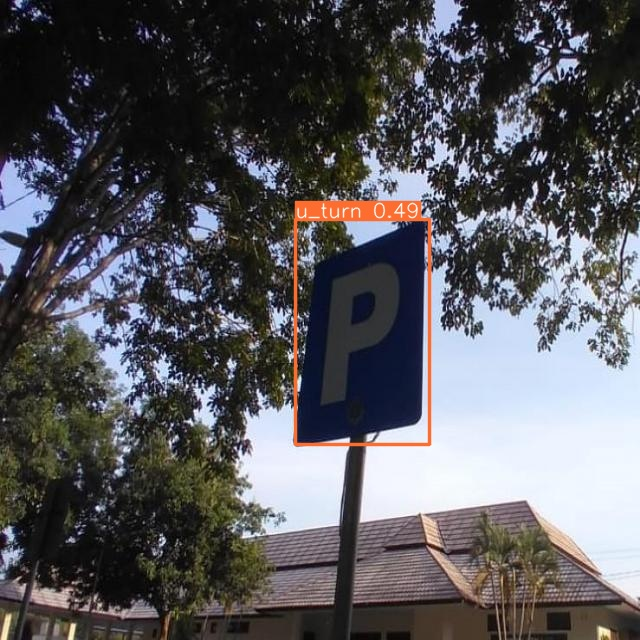

In [10]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")